In [12]:
#Takes the peaks and stores them as fingerprints
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [13]:
# running this cell loads the PCM-encoded data for the trumpet clip
with open("../Vicious_Vishnus/data/piano.txt", 'r') as R:
    trumpet_audio = np.asarray([int(i) for i in R])
    
sampling_rate = 44100 # sampling rate in Hz

<IPython.core.display.Javascript object>


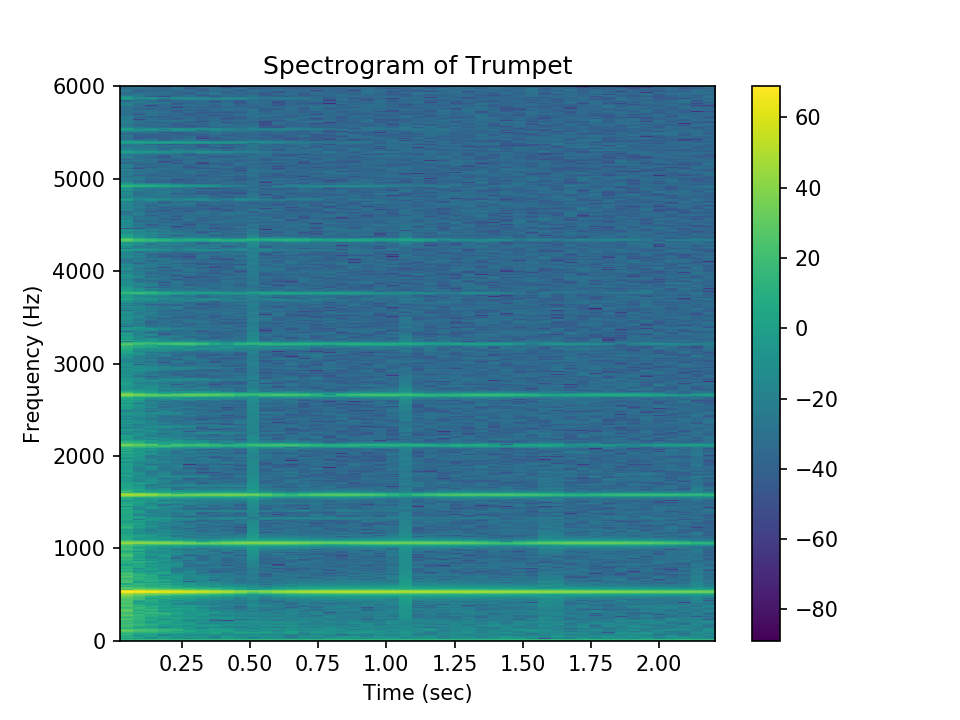

[ 37  36  34 ... 246 262 275]


In [14]:
# TESTING

fig, ax = plt.subplots()

S, freqs, times, im = ax.specgram(trumpet_audio, NFFT=4096, Fs=sampling_rate,
                                  window=mlab.window_hanning,
                                  noverlap=4096 // 2)
fig.colorbar(im)

print(trumpet_audio)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Trumpet")
ax.set_ylim(0, 6000);

In [4]:
def spectrogram_to_peaks(arr):
    """ 
    Creates a boolean array showing peaks, given data from a spectrogram.
    
    Parameters:
        arr: The array produced by the spectrogram from digital_to_spectrogram with shape (N,M)
        
    Returns:
        peaks: A boolean array with shape (N,M). Peaks in the data are where peaks == True.
    """
    # Creating the histogram
    arr_flattened = np.log(arr.flatten())
    N = arr_flattened.size # Number of elements in the array
    cnt, bin_edges = np.histogram(arr_flattened, bins=N//200, density=True)
    bin_width = np.diff(bin_edges) 
    
    ## print(np.sum(cnt*bin_width)) # check that summation = 1
    
    # Creating the cumulative distribution
    cumulative_distr = np.cumsum(cnt*bin_width)
    
    # Defining the cutoff
    frac_cut = 0.9
    bin_index_of_cutoff = np.searchsorted(cumulative_distr, frac_cut)
    
    # given the bin-index, we want the associated log-amplitude value for that bin
    cutoff_log_amplitude = bin_edges[bin_index_of_cutoff]
    
    # Defining the footprint
    fp = generate_binary_structure(rank=2,connectivity=2)
    
    peaks = ((arr > cutoff_log_amplitude) & (arr == maximum_filter(arr, footprint=fp)))
    
    return peaks

In [15]:
peaks = spectrogram_to_peaks(S)

In [69]:
import pickle
def peaks_to_dic_newsongs(local_peaks):
    with open("songs.pkl", mode="rb") as opened_file:
        song_dic = pickle.load(opened_file)
    freq, time= np.where(local_peaks)
    song_name=input("Song Name= ")
    for i in range(len(local_peaks)-15):
        j=1
        while j<16:
            finger=(freq[i], freq[i+j], time[j]-time[i])
            j+=1
            song_dir=(song_name, time[i])
            song_dic.update([(finger, song_dir)])
    with open("songs.pkl", mode="wb") as opened_file:
        pickle.dump(song_dic, opened_file)

In [83]:
from collections import Counter
def peaks_to_dic_findsong(local_peaks):
    with open("songs.pkl", mode="rb") as opened_file:
        song_dic2 = pickle.load(opened_file)
    freq, time= np.where(local_peaks)
    songList = []
    fingerList=[]
    for i in range(len(local_peaks)-15):
        j=1
        for j in range(16):
            finger=(freq[i], freq[i+j], time[i+j]-time[i])
            fingerList.append(finger)
            if finger in song_dic2:
                song_guess=song_dic2[finger]
                songList.append((song_guess[0], (song_guess[1]-finger[2])))
                Counter_songs= Counter(songList)
    song=Counter_songs.most_common(1)
    with open("songs.pkl", mode="wb") as opened_file:
        pickle.dump(song_dic2, opened_file)
    return song

In [81]:
local_peaks=spectrogram_to_peaks(S)
peaks_to_dic_newsongs(local_peaks)
peaks_to_dic_findsong(local_peaks)

Song Name= sdf
(0, 0, 0)
0
22
(0, 0, 2)
2
20
(0, 0, 4)
4
18
(0, 0, 7)
7
18
(0, 0, 9)
9
18
(0, 0, 11)
11
16
(0, 0, 13)
13
16
(0, 0, 15)
15
14
(0, 0, 17)
17
14
(0, 0, 19)
19
12
(0, 0, 21)
21
10
(0, 0, 24)
24
10
(0, 0, 26)
26
8
(0, 0, 28)
28
3
(0, 0, 30)
30
1
(0, 0, 33)
33
1
(0, 0, 0)
0
22
(0, 0, 2)
2
20
(0, 0, 5)
5
20
(0, 0, 7)
7
18
(0, 0, 9)
9
18
(0, 0, 11)
11
16
(0, 0, 13)
13
16
(0, 0, 15)
15
14
(0, 0, 17)
17
14
(0, 0, 19)
19
12
(0, 0, 22)
22
12
(0, 0, 24)
24
10
(0, 0, 26)
26
8
(0, 0, 28)
28
3
(0, 0, 31)
31
3
(0, 0, 33)
33
1
(0, 0, 0)
0
22
(0, 0, 3)
3
5
(0, 0, 5)
5
20
(0, 0, 7)
7
18
(0, 0, 9)
9
18
(0, 0, 11)
11
16
(0, 0, 13)
13
16
(0, 0, 15)
15
14
(0, 0, 17)
17
14
(0, 0, 20)
20
5
(0, 0, 22)
22
12
(0, 0, 24)
24
10
(0, 0, 26)
26
8
(0, 0, 29)
29
5
(0, 0, 31)
31
3
(0, 0, 34)
34
(0, 0, 0)
0
22
(0, 0, 2)
2
20
(0, 0, 4)
4
18
(0, 0, 6)
6
16
(0, 0, 8)
8
14
(0, 0, 10)
10
12
(0, 0, 12)
12
10
(0, 0, 14)
14
8
(0, 0, 17)
17
14
(0, 0, 19)
19
12
(0, 0, 21)
21
10
(0, 0, 23)
23
8
(0, 0, 26)
26
8
(0, 0, 

(10, 11, 8)
8
(10, 11, 11)
11
(10, 11, 30)
30
(10, 13, 4)
4
(10, 13, 6)
6
(10, 13, 14)
14
(10, 13, 17)
17
(10, 14, 20)
20
(10, 10, 0)
0
(10, 10, 3)
3
0
(10, 10, 8)
8
0
(10, 10, 11)
11
(10, 10, 14)
14
0
(10, 11, -22)
-22
32
(10, 11, -17)
-17
29
(10, 11, -5)
-5
(10, 11, -2)
-2
16
(10, 11, 17)
17
(10, 13, -9)
-9
(10, 13, -7)
-7
32
(10, 13, 1)
1
(10, 13, 4)
4
(10, 14, 7)
7
(10, 14, 11)
11
(10, 10, 0)
0
(10, 10, 5)
5
0
(10, 10, 8)
8
0
(10, 10, 11)
11
(10, 11, -25)
-25
37
(10, 11, -20)
-20
32
(10, 11, -8)
-8
(10, 11, -5)
-5
(10, 11, 14)
14
(10, 13, -12)
-12
37
(10, 13, -10)
-10
32
(10, 13, -2)
-2
29
(10, 13, 1)
1
(10, 14, 4)
4
(10, 14, 8)
8
(10, 14, 12)
12
(10, 10, 0)
0
(10, 10, 3)
3
0
(10, 10, 6)
6
(10, 11, -30)
-30
40
(10, 11, -25)
-25
37
(10, 11, -13)
-13
29
(10, 11, -10)
-10
(10, 11, 9)
9
(10, 13, -17)
-17
37
(10, 13, -15)
-15
37
(10, 13, -7)
-7
32
(10, 13, -4)
-4
29
(10, 14, -1)
-1
32
(10, 14, 3)
3
(10, 14, 7)
7
(10, 15, -37)
-37
(10, 10, 0)
0
(10, 10, 3)
3
0
(10, 11, -33)
-33
43
(10, 1

(20, 21, 25)
25
(20, 22, 2)
2
(20, 22, 7)
7
(20, 22, 27)
27
(20, 23, -8)
-8
37
(20, 23, -6)
-6
37
(20, 23, -2)
-2
(20, 23, 4)
4
18
(20, 23, 9)
9
18
(20, 23, 12)
12
(20, 23, 15)
15
(20, 20, 0)
0
(20, 20, 4)
4
(20, 21, -37)
-37
(20, 21, -4)
-4
(20, 21, 6)
6
(20, 22, -17)
-17
(20, 22, -12)
-12
(20, 22, 8)
8
(20, 23, -27)
-27
(20, 23, -25)
-25
41
(20, 23, -21)
-21
41
(20, 23, -15)
-15
37
(20, 23, -10)
-10
41
(20, 23, -7)
-7
(20, 23, -4)
-4
(20, 23, -1)
-1
(20, 20, 0)
0
(20, 21, -41)
-41
(20, 21, -8)
-8
18
(20, 21, 2)
2
(20, 22, -21)
-21
37
(20, 22, -16)
-16
(20, 22, 4)
4
(20, 23, -31)
-31
(20, 23, -29)
-29
(20, 23, -25)
-25
41
(20, 23, -19)
-19
41
(20, 23, -14)
-14
41
(20, 23, -11)
-11
(20, 23, -8)
-8
37
(20, 23, -5)
-5
(20, 25, -41)
-41
(21, 21, 0)
0
(21, 21, 33)
33
(21, 21, 43)
43
(21, 22, 20)
20
(21, 22, 25)
25
(21, 22, 45)
45
(21, 23, 10)
10
(21, 23, 12)
12
(21, 23, 16)
16
0
(21, 23, 22)
22
0
(21, 23, 27)
27
0
(21, 23, 30)
30
(21, 23, 33)
33
(21, 23, 36)
36
(21, 25, 0)
0
(21, 25, 11)
1

(29, 34, -26)
-26
(30, 30, 0)
0
(30, 30, 13)
13
(30, 30, 18)
18
(30, 30, 22)
22
(30, 30, 44)
44
(30, 31, 10)
10
(30, 31, 26)
26
(30, 32, 4)
4
(30, 32, 33)
33
(30, 33, 14)
14
(30, 33, 22)
22
0
(30, 33, 42)
42
(30, 34, 5)
5
22
(30, 34, 17)
17
(30, 34, 20)
20
(30, 34, 25)
25
(30, 30, 0)
0
(30, 30, 5)
5
0
(30, 30, 9)
9
(30, 30, 31)
31
(30, 31, -3)
-3
13
(30, 31, 13)
13
(30, 32, -9)
-9
(30, 32, 20)
20
(30, 33, 1)
1
(30, 33, 9)
9
13
(30, 33, 29)
29
(30, 34, -8)
-8
(30, 34, 4)
4
18
(30, 34, 7)
7
22
(30, 34, 12)
12
22
(30, 34, 20)
20
(30, 30, 0)
0
(30, 30, 4)
4
(30, 30, 26)
26
(30, 31, -8)
-8
18
(30, 31, 8)
8
(30, 32, -14)
-14
(30, 32, 15)
15
(30, 33, -4)
-4
22
(30, 33, 4)
4
(30, 33, 24)
24
(30, 34, -13)
-13
44
(30, 34, -1)
-1
(30, 34, 2)
2
(30, 34, 7)
7
22
(30, 34, 15)
15
(30, 34, 18)
18
13
(30, 30, 0)
0
(30, 30, 22)
22
(30, 31, -12)
-12
(30, 31, 4)
4
(30, 32, -18)
-18
(30, 32, 11)
11
(30, 33, -8)
-8
22
(30, 33, 0)
0
18
(30, 33, 20)
20
0
(30, 34, -17)
-17
44
(30, 34, -5)
-5
(30, 34, -2)
-2
22

(49, 58, -5)
-5
(49, 58, 4)
4
(49, 58, 23)
23
(49, 59, -18)
-18
(49, 59, -16)
-16
(49, 59, 0)
0
(49, 59, 12)
12
(49, 59, 15)
15
(49, 60, 6)
6
(49, 60, 8)
8
(55, 55, 0)
0
3
(55, 55, 3)
3
0
(55, 55, 22)
22
(55, 55, 33)
33
(55, 55, 45)
45
(55, 58, 13)
13
(55, 58, 22)
22
(55, 58, 41)
41
(55, 59, 0)
0
22
(55, 59, 2)
2
(55, 59, 18)
18
0
(55, 59, 30)
30
(55, 59, 33)
33
(55, 60, 24)
24
3
(55, 60, 26)
26
3
(55, 60, 39)
39
(55, 55, 0)
0
3
(55, 55, 19)
19
(55, 55, 30)
30
(55, 55, 42)
42
(55, 58, 10)
10
(55, 58, 19)
19
(55, 58, 38)
38
(55, 59, -3)
-3
(55, 59, -1)
-1
(55, 59, 15)
15
3
(55, 59, 27)
27
0
(55, 59, 30)
30
(55, 60, 21)
21
(55, 60, 23)
23
(55, 60, 36)
36
(55, 61, -3)
-3
(55, 55, 0)
0
3
(55, 55, 11)
11
(55, 55, 23)
23
(55, 58, -9)
-9
(55, 58, 0)
0
(55, 58, 19)
19
(55, 59, -22)
-22
(55, 59, -20)
-20
(55, 59, -4)
-4
22
(55, 59, 8)
8
(55, 59, 11)
11
(55, 60, 2)
2
(55, 60, 4)
4
(55, 60, 17)
17
(55, 61, -22)
-22
(55, 61, -12)
-12
(55, 55, 0)
0
3
(55, 55, 12)
12
(55, 58, -20)
-20
(55, 58, -11)


-12
(67, 68, 3)
3
(67, 68, 7)
7
(67, 69, -5)
-5
25
(67, 69, 0)
0
(67, 69, 30)
30
(67, 70, -15)
-15
33
(67, 70, 10)
10
15
(67, 70, 12)
12
15
(67, 70, 18)
18
(67, 71, -13)
-13
38
(67, 67, 0)
0
12
(67, 67, 6)
6
(67, 67, 8)
8
0
(67, 67, 13)
13
(67, 68, -22)
-22
(67, 68, -7)
-7
(67, 68, -3)
-3
15
(67, 69, -15)
-15
31
(67, 69, -10)
-10
(67, 69, 20)
20
(67, 70, -25)
-25
(67, 70, 0)
0
25
(67, 70, 2)
2
25
(67, 70, 8)
8
(67, 71, -23)
-23
(67, 71, -8)
-8
(67, 67, 0)
0
12
(67, 67, 2)
2
(67, 67, 7)
7
(67, 68, -28)
-28
33
(67, 68, -13)
-13
25
(67, 68, -9)
-9
(67, 69, -21)
-21
33
(67, 69, -16)
-16
(67, 69, 14)
14
(67, 70, -31)
-31
(67, 70, -6)
-6
31
(67, 70, -4)
-4
31
(67, 70, 2)
2
25
(67, 71, -29)
-29
(67, 71, -14)
-14
(67, 71, 0)
0
31
(67, 67, 0)
0
12
(67, 67, 5)
5
0
(67, 68, -30)
-30
38
(67, 68, -15)
-15
25
(67, 68, -11)
-11
25
(67, 69, -23)
-23
(67, 69, -18)
-18
(67, 69, 12)
12
(67, 70, -33)
-33
(67, 70, -8)
-8
33
(67, 70, -6)
-6
31
(67, 70, 0)
0
25
(67, 71, -31)
-31
(67, 71, -16)
-16
(67, 71, -2

1
(78, 82, 4)
4
(78, 78, 0)
0
(78, 78, 3)
3
(78, 78, 5)
5
(78, 78, 8)
8
(78, 78, 28)
28
(78, 79, 11)
11
(78, 79, 21)
21
(78, 79, 26)
26
(78, 80, 1)
1
17
(78, 80, 30)
30
(78, 81, -14)
-14
(78, 81, 15)
15
14
(78, 81, 18)
18
(78, 81, 20)
20
(78, 82, -4)
-4
(78, 82, -1)
-1
(78, 78, 0)
0
(78, 78, 2)
2
6
(78, 78, 5)
5
(78, 78, 25)
25
(78, 79, 8)
8
6
(78, 79, 18)
18
(78, 79, 23)
23
(78, 80, -2)
-2
(78, 80, 27)
27
(78, 81, -17)
-17
(78, 81, 12)
12
(78, 81, 15)
15
14
(78, 81, 17)
17
(78, 82, -7)
-7
(78, 82, -4)
-4
(78, 82, 2)
2
(78, 78, 0)
0
(78, 78, 3)
3
(78, 78, 23)
23
(78, 79, 6)
6
(78, 79, 16)
16
(78, 79, 21)
21
(78, 80, -4)
-4
(78, 80, 25)
25
(78, 81, -19)
-19
(78, 81, 10)
10
17
(78, 81, 13)
13
14
(78, 81, 15)
15
14
(78, 82, -9)
-9
(78, 82, -6)
-6
(78, 82, 0)
0
(78, 82, 26)
26
(78, 78, 0)
0
(78, 78, 20)
20
(78, 79, 3)
3
(78, 79, 13)
13
(78, 79, 18)
18
(78, 80, -7)
-7
(78, 80, 22)
22
(78, 81, -22)
-22
42
(78, 81, 7)
7
(78, 81, 10)
10
17
(78, 81, 12)
12
(78, 82, -12)
-12
(78, 82, -9)
-9
(78,

0
(89, 90, -26)
-26
34
(89, 90, -12)
-12
22
(89, 90, -3)
-3
(89, 90, 4)
4
(89, 91, -41)
-41
(89, 91, -22)
-22
(89, 92, -19)
-19
(89, 92, 4)
4
(89, 93, -31)
-31
(89, 98, -41)
-41
(89, 98, -30)
-30
(89, 98, -20)
-20
(89, 98, -4)
-4
(89, 102, -41)
-41
(89, 102, -19)
-19
(90, 90, 0)
0
(90, 90, 14)
14
(90, 90, 23)
23
(90, 90, 30)
30
(90, 91, -15)
-15
(90, 91, 4)
4
(90, 92, 7)
7
(90, 92, 30)
30
(90, 93, -5)
-5
(90, 98, -15)
-15
(90, 98, -4)
-4
29
(90, 98, 6)
6
(90, 98, 22)
22
(90, 102, -15)
-15
(90, 102, 7)
7
(90, 104, -15)
-15
(90, 90, 0)
0
(90, 90, 9)
9
(90, 90, 16)
16
(90, 91, -29)
-29
(90, 91, -10)
-10
(90, 92, -7)
-7
(90, 92, 16)
16
(90, 93, -19)
-19
(90, 98, -29)
-29
45
(90, 98, -18)
-18
38
(90, 98, -8)
-8
(90, 98, 8)
8
(90, 102, -29)
-29
(90, 102, -7)
-7
(90, 104, -29)
-29
(90, 104, -23)
-23
(90, 90, 0)
0
(90, 90, 7)
7
(90, 91, -38)
-38
(90, 91, -19)
-19
29
(90, 92, -16)
-16
(90, 92, 7)
7
(90, 93, -28)
-28
(90, 98, -38)
-38
(90, 98, -27)
-27
45
(90, 98, -17)
-17
(90, 98, -1)
-1
(90, 1

28
(110, 112, 3)
3
26
(110, 113, -6)
-6
(110, 113, -3)
-3
(110, 110, 0)
0
(110, 110, 5)
5
7
(110, 111, -38)
-38
43
(110, 111, -35)
-35
43
(110, 111, -5)
-5
19
(110, 111, 2)
2
(110, 111, 8)
8
(110, 112, -31)
-31
(110, 112, -28)
-28
(110, 112, -25)
-25
43
(110, 112, -23)
-23
43
(110, 112, -18)
-18
43
(110, 112, -7)
-7
(110, 113, -16)
-16
43
(110, 113, -13)
-13
(110, 113, 5)
5
(110, 110, 0)
0
(110, 111, -43)
-43
(110, 111, -40)
-40
43
(110, 111, -10)
-10
26
(110, 111, -3)
-3
19
(110, 111, 3)
3
19
(110, 112, -36)
-36
(110, 112, -33)
-33
(110, 112, -30)
-30
(110, 112, -28)
-28
(110, 112, -23)
-23
43
(110, 112, -12)
-12
(110, 113, -21)
-21
(110, 113, -18)
-18
(110, 113, 0)
0
(110, 114, -43)
-43
(111, 111, 0)
0
3
(111, 111, 3)
3
0
(111, 111, 33)
33
(111, 111, 40)
40
(111, 111, 46)
46
(111, 112, 7)
7
3
(111, 112, 10)
10
(111, 112, 13)
13
3
(111, 112, 15)
15
3
(111, 112, 20)
20
0
(111, 112, 31)
31
(111, 113, 22)
22
3
(111, 113, 25)
25
0
(111, 113, 43)
43
(111, 114, 0)
0
(111, 115, 5)
5
(111, 11

5
(119, 120, -23)
-23
(119, 120, -5)
-5
(119, 120, 7)
7
(119, 120, 9)
9
(119, 120, 13)
13
(119, 121, -14)
-14
(119, 121, 1)
1
(119, 121, 20)
20
(119, 122, -24)
-24
(119, 123, -16)
-16
(119, 123, -13)
-13
(119, 123, -9)
-9
(119, 123, -6)
-6
(119, 123, -3)
-3
(119, 119, 0)
0
(119, 120, -28)
-28
(119, 120, -10)
-10
24
(119, 120, 2)
2
(119, 120, 4)
4
(119, 120, 8)
8
(119, 121, -19)
-19
(119, 121, -4)
-4
24
(119, 121, 15)
15
(119, 122, -29)
-29
(119, 123, -21)
-21
(119, 123, -18)
-18
(119, 123, -14)
-14
(119, 123, -11)
-11
(119, 123, -8)
-8
(119, 123, -2)
-2
29
(120, 120, 0)
0
(120, 120, 18)
18
(120, 120, 30)
30
(120, 120, 32)
32
(120, 120, 36)
36
(120, 121, 9)
9
(120, 121, 24)
24
(120, 121, 43)
43
(120, 122, -1)
-1
(120, 123, 7)
7
(120, 123, 10)
10
19
(120, 123, 14)
14
(120, 123, 17)
17
(120, 123, 20)
20
(120, 123, 26)
26
1
(120, 123, 32)
32
(120, 120, 0)
0
(120, 120, 12)
12
(120, 120, 14)
14
(120, 120, 18)
18
(120, 121, -9)
-9
19
(120, 121, 6)
6
(120, 121, 25)
25
(120, 122, -19)
-19
(120,

-17
(127, 128, -12)
-12
(127, 128, -7)
-7
(127, 128, 11)
11
5
(127, 129, -34)
-34
(127, 129, -10)
-10
(127, 129, 6)
6
(127, 130, -26)
-26
(127, 130, -5)
-5
34
(127, 130, -3)
-3
34
(127, 130, 3)
3
(127, 130, 12)
12
(127, 127, 0)
0
5
(127, 128, -35)
-35
(127, 128, -32)
-32
42
(127, 128, -25)
-25
(127, 128, -20)
-20
34
(127, 128, -15)
-15
(127, 128, 3)
3
5
(127, 129, -42)
-42
(127, 129, -18)
-18
(127, 129, -2)
-2
(127, 130, -34)
-34
(127, 130, -13)
-13
42
(127, 130, -11)
-11
42
(127, 130, -5)
-5
34
(127, 130, 4)
4
(127, 131, -32)
-32
(128, 128, 0)
0
10
(128, 128, 3)
3
7
(128, 128, 10)
10
(128, 128, 15)
15
(128, 128, 20)
20
(128, 128, 38)
38
(128, 129, -7)
-7
17
(128, 129, 17)
17
(128, 129, 33)
33
(128, 130, 1)
1
17
(128, 130, 22)
22
7
(128, 130, 24)
24
(128, 130, 30)
30
(128, 130, 39)
39
(128, 131, 3)
3
22
(128, 131, 7)
7
27
(128, 128, 0)
0
10
(128, 128, 7)
7
(128, 128, 12)
12
(128, 128, 17)
17
(128, 128, 35)
35
(128, 129, -10)
-10
22
(128, 129, 14)
14
(128, 129, 30)
30
(128, 130, -2)
-2


29
(135, 137, 0)
0
(135, 138, 2)
2
(135, 138, 5)
5
(135, 138, 10)
10
(135, 138, 15)
15
10
(135, 138, 27)
27
(135, 138, 34)
34
(136, 136, 0)
0
8
(136, 136, 8)
8
0
(136, 136, 15)
15
(136, 136, 25)
25
(136, 136, 27)
27
(136, 136, 31)
31
(136, 136, 34)
34
(136, 136, 39)
39
(136, 137, 10)
10
(136, 138, 12)
12
15
(136, 138, 15)
15
(136, 138, 20)
20
0
(136, 138, 25)
25
0
(136, 138, 37)
37
(136, 138, 44)
44
(136, 139, 8)
8
(136, 136, 0)
0
8
(136, 136, 7)
7
(136, 136, 17)
17
(136, 136, 19)
19
(136, 136, 23)
23
(136, 136, 26)
26
(136, 136, 31)
31
(136, 137, 2)
2
(136, 138, 4)
4
(136, 138, 7)
7
15
(136, 138, 12)
12
15
(136, 138, 17)
17
8
(136, 138, 29)
29
0
(136, 138, 36)
36
(136, 139, 0)
0
27
(136, 139, 20)
20
(136, 136, 0)
0
8
(136, 136, 10)
10
0
(136, 136, 12)
12
0
(136, 136, 16)
16
0
(136, 136, 19)
19
(136, 136, 24)
24
(136, 137, -5)
-5
(136, 138, -3)
-3
25
(136, 138, 0)
0
25
(136, 138, 5)
5
15
(136, 138, 10)
10
15
(136, 138, 22)
22
0
(136, 138, 29)
29
0
(136, 139, -7)
-7
(136, 139, 13)
13
(1

6
14
(153, 154, 8)
8
(153, 154, 12)
12
(153, 154, 16)
16
(153, 154, 22)
22
(153, 155, -10)
-10
(153, 155, 2)
2
(153, 155, 20)
20
(153, 155, 29)
29
(153, 156, -6)
-6
40
(153, 156, 0)
0
34
(153, 153, 0)
0
(153, 153, 6)
6
(153, 153, 11)
11
(153, 154, -34)
-34
(153, 154, -14)
-14
(153, 154, -12)
-12
(153, 154, -8)
-8
(153, 154, -4)
-4
14
(153, 154, 2)
2
14
(153, 155, -30)
-30
(153, 155, -18)
-18
40
(153, 155, 0)
0
(153, 155, 9)
9
(153, 156, -26)
-26
(153, 156, -20)
-20
45
(153, 156, -8)
-8
(153, 153, 0)
0
(153, 153, 5)
5
(153, 154, -40)
-40
45
(153, 154, -20)
-20
34
(153, 154, -18)
-18
34
(153, 154, -14)
-14
(153, 154, -10)
-10
(153, 154, -4)
-4
14
(153, 155, -36)
-36
(153, 155, -24)
-24
(153, 155, -6)
-6
(153, 155, 3)
3
(153, 156, -32)
-32
(153, 156, -26)
-26
(153, 156, -14)
-14
45
(153, 156, -12)
-12
(153, 153, 0)
0
(153, 154, -45)
-45
(153, 154, -25)
-25
(153, 154, -23)
-23
(153, 154, -19)
-19
(153, 154, -15)
-15
(153, 154, -9)
-9
(153, 155, -41)
-41
(153, 155, -29)
-29
45
(153, 155, -1

(159, 163, -5)
-5
(159, 164, -28)
-28
(159, 159, 0)
0
(159, 160, -32)
-32
(159, 160, -23)
-23
(159, 160, -12)
-12
20
(159, 161, -43)
-43
(159, 161, -38)
-38
(159, 161, -15)
-15
(159, 161, 0)
0
20
(159, 162, -45)
-45
(159, 162, -21)
-21
(159, 162, -7)
-7
(159, 163, -26)
-26
(159, 163, -18)
-18
45
(159, 163, -12)
-12
(159, 164, -35)
-35
(159, 164, -4)
-4
38
(160, 160, 0)
0
(160, 160, 9)
9
(160, 160, 20)
20
(160, 161, -11)
-11
(160, 161, -6)
-6
(160, 161, 17)
17
(160, 161, 32)
32
(160, 162, -13)
-13
(160, 162, 11)
11
(160, 162, 25)
25
(160, 163, 6)
6
(160, 163, 14)
14
13
(160, 163, 20)
20
(160, 164, -3)
-3
(160, 164, 28)
28
(160, 164, 32)
32
(160, 160, 0)
0
(160, 160, 11)
11
(160, 161, -20)
-20
(160, 161, -15)
-15
(160, 161, 8)
8
(160, 161, 23)
23
(160, 162, -22)
-22
(160, 162, 2)
2
(160, 162, 16)
16
(160, 163, -3)
-3
(160, 163, 5)
5
(160, 163, 11)
11
(160, 164, -12)
-12
(160, 164, 19)
19
(160, 164, 23)
23
(160, 165, -19)
-19
(160, 160, 0)
0
(160, 161, -31)
-31
(160, 161, -26)
-26
(160, 1

-13
(167, 170, -8)
-8
(167, 170, -4)
-4
(167, 171, -34)
-34
(167, 171, -10)
-10
41
(167, 172, -29)
-29
(168, 168, 0)
0
(168, 168, 8)
8
(168, 169, -23)
-23
31
(168, 169, -21)
-21
31
(168, 169, -18)
-18
(168, 169, -14)
-14
(168, 169, -11)
-11
(168, 169, 14)
14
(168, 170, -31)
-31
(168, 170, -3)
-3
(168, 170, 2)
2
(168, 170, 6)
6
(168, 171, -24)
-24
(168, 171, 0)
0
(168, 172, -19)
-19
(168, 172, -5)
-5
39
(168, 168, 0)
0
(168, 169, -31)
-31
39
(168, 169, -29)
-29
39
(168, 169, -26)
-26
31
(168, 169, -22)
-22
(168, 169, -19)
-19
31
(168, 169, 6)
6
(168, 170, -39)
-39
(168, 170, -11)
-11
31
(168, 170, -6)
-6
31
(168, 170, -2)
-2
(168, 171, -32)
-32
(168, 171, -8)
-8
(168, 172, -27)
-27
(168, 172, -13)
-13
(168, 172, 1)
1
(169, 169, 0)
0
10
(169, 169, 2)
2
8
(169, 169, 5)
5
(169, 169, 9)
9
(169, 169, 12)
12
(169, 169, 37)
37
(169, 170, -8)
-8
20
(169, 170, 20)
20
(169, 170, 25)
25
(169, 170, 29)
29
(169, 171, -1)
-1
17
(169, 171, 23)
23
(169, 172, 4)
4
(169, 172, 18)
18
13
(169, 172, 32)
32


2
(174, 175, 8)
8
2
(174, 175, 17)
17
(174, 176, 19)
19
(174, 177, -26)
-26
(174, 177, -8)
-8
26
(174, 177, -1)
-1
26
(174, 177, 6)
6
(174, 177, 12)
12
(174, 178, -11)
-11
38
(174, 178, -4)
-4
(174, 178, 1)
1
(174, 174, 0)
0
(174, 175, -38)
-38
(174, 175, -31)
-31
(174, 175, -10)
-10
(174, 175, -4)
-4
(174, 175, 5)
5
(174, 176, 7)
7
(174, 177, -38)
-38
(174, 177, -20)
-20
38
(174, 177, -13)
-13
38
(174, 177, -6)
-6
26
(174, 177, 0)
0
(174, 178, -23)
-23
(174, 178, -16)
-16
(174, 178, -11)
-11
38
(174, 179, -33)
-33
(175, 175, 0)
0
(175, 175, 7)
7
(175, 175, 28)
28
(175, 175, 34)
34
(175, 175, 43)
43
(175, 176, 45)
45
(175, 177, 0)
0
(175, 177, 18)
18
0
(175, 177, 25)
25
(175, 177, 32)
32
(175, 177, 38)
38
(175, 178, 15)
15
7
(175, 178, 22)
22
(175, 178, 27)
27
0
(175, 179, 5)
5
(175, 179, 8)
8
(175, 175, 0)
0
(175, 175, 21)
21
(175, 175, 27)
27
(175, 175, 36)
36
(175, 176, 38)
38
(175, 177, -7)
-7
(175, 177, 11)
11
7
(175, 177, 18)
18
0
(175, 177, 25)
25
(175, 177, 31)
31
(175, 178, 8)

-14
36
(181, 183, -11)
-11
36
(181, 183, -1)
-1
15
(181, 183, 5)
5
15
(181, 184, -33)
-33
(181, 184, -17)
-17
(181, 184, -7)
-7
36
(181, 184, -5)
-5
39
(181, 181, 0)
0
(181, 182, -32)
-32
(181, 182, -11)
-11
(181, 182, 6)
6
(181, 183, -29)
-29
39
(181, 183, -25)
-25
39
(181, 183, -22)
-22
36
(181, 183, -17)
-17
39
(181, 183, -14)
-14
36
(181, 183, -4)
-4
(181, 183, 2)
2
(181, 184, -36)
-36
(181, 184, -20)
-20
(181, 184, -10)
-10
39
(181, 184, -8)
-8
39
(181, 184, -6)
-6
(182, 182, 0)
0
(182, 182, 21)
21
(182, 182, 38)
38
(182, 183, 3)
3
7
(182, 183, 7)
7
7
(182, 183, 10)
10
(182, 183, 15)
15
(182, 183, 18)
18
(182, 183, 28)
28
(182, 183, 34)
34
(182, 184, -4)
-4
(182, 184, 12)
12
(182, 184, 22)
22
7
(182, 184, 24)
24
7
(182, 184, 26)
26
(182, 184, 32)
32
(182, 182, 0)
0
(182, 182, 17)
17
(182, 183, -18)
-18
28
(182, 183, -14)
-14
28
(182, 183, -11)
-11
(182, 183, -6)
-6
(182, 183, -3)
-3
(182, 183, 7)
7
7
(182, 183, 13)
13
7
(182, 184, -25)
-25
45
(182, 184, -9)
-9
(182, 184, 1)
1
28
(

(189, 191, 22)
22
5
(189, 191, 24)
24
5
(189, 191, 43)
43
(189, 192, 29)
29
(189, 189, 0)
0
5
(189, 189, 22)
22
(189, 189, 24)
24
(189, 189, 30)
30
(189, 189, 35)
35
(189, 190, 8)
8
(189, 190, 27)
27
(189, 190, 40)
40
(189, 191, -5)
-5
27
(189, 191, 2)
2
(189, 191, 12)
12
(189, 191, 17)
17
5
(189, 191, 19)
19
(189, 191, 38)
38
(189, 192, 24)
24
(189, 196, -5)
-5
(189, 189, 0)
0
5
(189, 189, 2)
2
(189, 189, 8)
8
0
(189, 189, 13)
13
(189, 190, -14)
-14
(189, 190, 5)
5
(189, 190, 18)
18
0
(189, 191, -27)
-27
(189, 191, -20)
-20
40
(189, 191, -10)
-10
(189, 191, -5)
-5
27
(189, 191, -3)
-3
(189, 191, 16)
16
(189, 192, 2)
2
27
(189, 196, -27)
-27
(189, 196, -23)
-23
(189, 189, 0)
0
5
(189, 189, 6)
6
(189, 189, 11)
11
(189, 190, -16)
-16
(189, 190, 3)
3
(189, 190, 16)
16
0
(189, 191, -29)
-29
(189, 191, -22)
-22
40
(189, 191, -12)
-12
(189, 191, -7)
-7
29
(189, 191, -5)
-5
27
(189, 191, 14)
14
(189, 192, 0)
0
(189, 196, -29)
-29
(189, 196, -25)
-25
(189, 196, -17)
-17
(189, 189, 0)
0
5
(189,

-41
(206, 208, -39)
-39
(206, 208, -31)
-31
45
(206, 208, -21)
-21
(206, 208, -12)
-12
(206, 208, -7)
-7
(206, 209, -25)
-25
(206, 209, -19)
-19
(206, 209, 0)
0
(206, 210, -17)
-17
(206, 210, -4)
-4
(206, 210, -2)
-2
(207, 207, 0)
0
(207, 207, 6)
6
(207, 207, 9)
9
(207, 208, -18)
-18
28
(207, 208, -16)
-16
28
(207, 208, -8)
-8
22
(207, 208, 2)
2
(207, 208, 11)
11
(207, 208, 16)
16
(207, 209, -2)
-2
22
(207, 209, 4)
4
(207, 209, 23)
23
(207, 210, 6)
6
(207, 210, 19)
19
(207, 210, 21)
21
(207, 211, -22)
-22
(207, 207, 0)
0
(207, 207, 3)
3
(207, 208, -24)
-24
(207, 208, -22)
-22
(207, 208, -14)
-14
28
(207, 208, -4)
-4
22
(207, 208, 5)
5
(207, 208, 10)
10
(207, 209, -8)
-8
28
(207, 209, -2)
-2
22
(207, 209, 17)
17
(207, 210, 0)
0
(207, 210, 13)
13
(207, 210, 15)
15
(207, 211, -28)
-28
(207, 211, -26)
-26
(207, 207, 0)
0
(207, 208, -27)
-27
(207, 208, -25)
-25
(207, 208, -17)
-17
31
(207, 208, -7)
-7
(207, 208, 2)
2
(207, 208, 7)
7
(207, 209, -11)
-11
31
(207, 209, -5)
-5
(207, 209, 14)
14

-32
(213, 216, -29)
-29
(213, 216, -20)
-20
(213, 213, 0)
0
12
(213, 214, -34)
-34
42
(213, 214, -20)
-20
30
(213, 214, -16)
-16
(213, 215, -41)
-41
(213, 215, -36)
-36
(213, 215, -28)
-28
44
(213, 215, -14)
-14
30
(213, 215, -12)
-12
30
(213, 215, -9)
-9
(213, 215, -6)
-6
22
(213, 216, -44)
-44
(213, 216, -34)
-34
(213, 216, -31)
-31
(213, 216, -22)
-22
(213, 216, -2)
-2
(214, 214, 0)
0
(214, 214, 14)
14
(214, 214, 18)
18
(214, 215, -7)
-7
(214, 215, -2)
-2
10
(214, 215, 6)
6
10
(214, 215, 20)
20
(214, 215, 22)
22
(214, 215, 25)
25
(214, 215, 28)
28
(214, 216, -10)
-10
28
(214, 216, 0)
0
(214, 216, 3)
3
24
(214, 216, 12)
12
10
(214, 216, 32)
32
(214, 216, 35)
35
(214, 214, 0)
0
(214, 214, 4)
4
(214, 215, -21)
-21
(214, 215, -16)
-16
28
(214, 215, -8)
-8
24
(214, 215, 6)
6
10
(214, 215, 8)
8
10
(214, 215, 11)
11
(214, 215, 14)
14
(214, 216, -24)
-24
(214, 216, -14)
-14
(214, 216, -11)
-11
(214, 216, -2)
-2
24
(214, 216, 18)
18
(214, 216, 21)
21
10
(214, 217, 2)
2
(214, 214, 0)
0
(214, 

22
(226, 229, 12)
12
22
(226, 226, 0)
0
(226, 226, 12)
12
(226, 227, 4)
4
(226, 227, 8)
8
(226, 228, -33)
-33
45
(226, 228, -29)
-29
45
(226, 228, -18)
-18
(226, 228, -11)
-11
(226, 228, -9)
-9
(226, 228, -5)
-5
(226, 229, -25)
-25
45
(226, 229, -15)
-15
(226, 229, -7)
-7
(226, 229, -2)
-2
33
(226, 229, 1)
1
33
(226, 229, 13)
13
(226, 226, 0)
0
(226, 227, -8)
-8
(226, 227, -4)
-4
(226, 228, -45)
-45
(226, 228, -41)
-41
(226, 228, -30)
-30
(226, 228, -23)
-23
33
(226, 228, -21)
-21
33
(226, 228, -17)
-17
33
(226, 229, -37)
-37
(226, 229, -27)
-27
(226, 229, -19)
-19
(226, 229, -14)
-14
45
(226, 229, -11)
-11
33
(226, 229, 1)
1
33
(226, 230, -45)
-45
(227, 227, 0)
0
(227, 227, 4)
4
(227, 228, -37)
-37
(227, 228, -33)
-33
41
(227, 228, -22)
-22
(227, 228, -15)
-15
(227, 228, -13)
-13
(227, 228, -9)
-9
(227, 229, -29)
-29
(227, 229, -19)
-19
41
(227, 229, -11)
-11
(227, 229, -6)
-6
(227, 229, -3)
-3
(227, 229, 9)
9
(227, 230, -37)
-37
(227, 230, -34)
-34
(227, 227, 0)
0
(227, 228, -41)
-41

-30
44
(240, 242, -20)
-20
(240, 242, 10)
10
(240, 247, -30)
-30
(240, 247, -25)
-25
(240, 247, -18)
-18
(240, 247, -10)
-10
41
(240, 247, -2)
-2
(240, 247, 8)
8
(240, 247, 16)
16
(240, 240, 0)
0
(240, 240, 3)
3
0
(240, 241, -28)
-28
(240, 241, -19)
-19
(240, 241, -8)
-8
20
(240, 242, -41)
-41
(240, 242, -31)
-31
(240, 242, -1)
-1
(240, 247, -41)
-41
(240, 247, -36)
-36
(240, 247, -29)
-29
(240, 247, -21)
-21
41
(240, 247, -13)
-13
(240, 247, -3)
-3
30
(240, 247, 5)
5
20
(240, 250, 4)
4
(240, 240, 0)
0
(240, 241, -31)
-31
41
(240, 241, -22)
-22
30
(240, 241, -11)
-11
(240, 242, -44)
-44
(240, 242, -34)
-34
44
(240, 242, -4)
-4
20
(240, 247, -44)
-44
(240, 247, -39)
-39
(240, 247, -32)
-32
(240, 247, -24)
-24
44
(240, 247, -16)
-16
41
(240, 247, -6)
-6
(240, 247, 2)
2
20
(240, 250, 1)
1
(240, 251, -6)
-6
(241, 241, 0)
0
(241, 241, 9)
9
(241, 241, 20)
20
(241, 242, -13)
-13
(241, 242, -3)
-3
13
(241, 242, 27)
27
(241, 247, -13)
-13
33
(241, 247, -8)
-8
22
(241, 247, -1)
-1
(241, 247, 7)


(260, 261, 35)
35
(260, 261, 43)
43
(260, 262, 0)
0
(260, 262, 4)
4
(260, 262, 13)
13
(260, 262, 20)
20
0
(260, 262, 27)
27
(260, 262, 33)
33
(260, 262, 39)
39
(260, 263, 10)
10
(260, 263, 15)
15
(260, 263, 22)
22
(260, 263, 30)
30
(261, 261, 0)
0
(261, 261, 6)
6
(261, 261, 10)
10
(261, 261, 18)
18
(261, 262, -25)
-25
35
(261, 262, -21)
-21
35
(261, 262, -12)
-12
(261, 262, -5)
-5
25
(261, 262, 2)
2
(261, 262, 8)
8
(261, 262, 14)
14
(261, 263, -15)
-15
35
(261, 263, -10)
-10
35
(261, 263, -3)
-3
(261, 263, 5)
5
(261, 263, 16)
16
(261, 261, 0)
0
(261, 261, 4)
4
(261, 261, 12)
12
(261, 262, -31)
-31
43
(261, 262, -27)
-27
43
(261, 262, -18)
-18
(261, 262, -11)
-11
31
(261, 262, -4)
-4
(261, 262, 2)
2
(261, 262, 8)
8
(261, 263, -21)
-21
43
(261, 263, -16)
-16
43
(261, 263, -9)
-9
31
(261, 263, -1)
-1
(261, 263, 10)
10
(261, 265, -9)
-9
43
(261, 261, 0)
0
(261, 261, 8)
8
(261, 262, -35)
-35
43
(261, 262, -31)
-31
43
(261, 262, -22)
-22
(261, 262, -15)
-15
31
(261, 262, -8)
-8
(261, 262, -2

38
(267, 269, -2)
-2
(267, 269, 1)
1
15
(267, 269, 35)
35
(267, 270, 6)
6
(267, 270, 23)
23
(267, 271, -6)
-6
(267, 271, 1)
1
(267, 271, 12)
12
15
(267, 267, 0)
0
(267, 267, 21)
21
(267, 268, -3)
-3
15
(267, 268, 5)
5
7
(267, 268, 11)
11
(267, 268, 15)
15
(267, 268, 30)
30
(267, 269, -10)
-10
(267, 269, -7)
-7
(267, 269, 27)
27
(267, 270, -2)
-2
(267, 270, 15)
15
(267, 271, -14)
-14
(267, 271, -7)
-7
36
(267, 271, 4)
4
(267, 271, 6)
6
(267, 267, 0)
0
(267, 268, -24)
-24
36
(267, 268, -16)
-16
(267, 268, -10)
-10
15
(267, 268, -6)
-6
(267, 268, 9)
9
7
(267, 269, -31)
-31
(267, 269, -28)
-28
(267, 269, 6)
6
(267, 270, -23)
-23
(267, 270, -6)
-6
(267, 271, -35)
-35
(267, 271, -28)
-28
(267, 271, -17)
-17
(267, 271, -15)
-15
(267, 271, -11)
-11
36
(268, 268, 0)
0
(268, 268, 8)
8
(268, 268, 14)
14
(268, 268, 18)
18
(268, 268, 33)
33
(268, 269, -7)
-7
(268, 269, -4)
-4
(268, 269, 30)
30
(268, 270, 1)
1
(268, 270, 18)
18
(268, 271, -11)
-11
(268, 271, -4)
-4
26
(268, 271, 7)
7
20
(268, 271, 9

(273, 277, -2)
-2
(273, 278, -36)
-36
(274, 274, 0)
0
(274, 274, 20)
20
(274, 274, 23)
23
(274, 274, 30)
30
(274, 274, 35)
35
(274, 275, 25)
25
(274, 276, 6)
6
(274, 276, 12)
12
4
(274, 276, 16)
16
(274, 277, -4)
-4
24
(274, 277, 20)
20
(274, 277, 32)
32
(274, 277, 38)
38
(274, 277, 40)
40
(274, 278, 6)
6
(274, 278, 9)
9
(274, 274, 0)
0
(274, 274, 3)
3
(274, 274, 10)
10
(274, 274, 15)
15
(274, 275, 5)
5
(274, 276, -14)
-14
(274, 276, -8)
-8
24
(274, 276, -4)
-4
(274, 277, -24)
-24
(274, 277, 0)
0
(274, 277, 12)
12
(274, 277, 18)
18
4
(274, 277, 20)
20
(274, 278, -14)
-14
39
(274, 278, -11)
-11
(274, 278, -3)
-3
34
(274, 274, 0)
0
(274, 274, 7)
7
(274, 274, 12)
12
(274, 275, 2)
2
(274, 276, -17)
-17
27
(274, 276, -11)
-11
(274, 276, -7)
-7
(274, 277, -27)
-27
39
(274, 277, -3)
-3
(274, 277, 9)
9
(274, 277, 15)
15
(274, 277, 17)
17
(274, 278, -17)
-17
39
(274, 278, -14)
-14
39
(274, 278, -6)
-6
(274, 278, 0)
0
34
(274, 274, 0)
0
(274, 274, 5)
5
(274, 275, -5)
-5
(274, 276, -24)
-24
34
(2

-13
23
(280, 281, 4)
4
(280, 281, 8)
8
(280, 282, -3)
-3
19
(280, 282, 28)
28
(280, 282, 30)
30
(280, 283, -8)
-8
(280, 283, -1)
-1
23
(280, 283, 14)
14
13
(280, 283, 22)
22
(280, 283, 25)
25
(280, 280, 0)
0
(280, 280, 4)
4
(280, 280, 8)
8
(280, 280, 15)
15
(280, 281, -19)
-19
27
(280, 281, -2)
-2
(280, 281, 2)
2
(280, 282, -9)
-9
23
(280, 282, 22)
22
(280, 282, 24)
24
(280, 283, -14)
-14
34
(280, 283, -7)
-7
27
(280, 283, 8)
8
19
(280, 283, 16)
16
13
(280, 283, 19)
19
(280, 284, -12)
-12
(280, 280, 0)
0
(280, 280, 4)
4
(280, 280, 11)
11
(280, 281, -23)
-23
(280, 281, -6)
-6
(280, 281, -2)
-2
(280, 282, -13)
-13
27
(280, 282, 18)
18
(280, 282, 20)
20
(280, 283, -18)
-18
34
(280, 283, -11)
-11
(280, 283, 4)
4
23
(280, 283, 12)
12
19
(280, 283, 15)
15
(280, 284, -16)
-16
(280, 284, -5)
-5
34
(280, 280, 0)
0
(280, 280, 7)
7
(280, 281, -27)
-27
(280, 281, -10)
-10
(280, 281, -6)
-6
(280, 282, -17)
-17
(280, 282, 14)
14
(280, 282, 16)
16
(280, 283, -22)
-22
(280, 283, -15)
-15
(280, 283, 0)

(286, 289, -3)
-3
34
(286, 289, 2)
2
(286, 290, -15)
-15
(286, 290, -11)
-11
42
(286, 291, -39)
-39
(287, 287, 0)
0
(287, 287, 2)
2
(287, 287, 8)
8
(287, 287, 19)
19
(287, 288, -12)
-12
22
(287, 288, 15)
15
(287, 289, -20)
-20
(287, 289, -10)
-10
28
(287, 289, -3)
-3
(287, 289, 17)
17
(287, 289, 19)
19
(287, 289, 24)
24
(287, 290, 7)
7
20
(287, 290, 11)
11
(287, 291, -17)
-17
(287, 291, 2)
2
(287, 287, 0)
0
(287, 287, 6)
6
(287, 287, 17)
17
(287, 288, -14)
-14
22
(287, 288, 13)
13
(287, 289, -22)
-22
(287, 289, -12)
-12
28
(287, 289, -5)
-5
(287, 289, 15)
15
(287, 289, 17)
17
(287, 289, 22)
22
(287, 290, 5)
5
22
(287, 290, 9)
9
20
(287, 291, -19)
-19
(287, 291, 0)
0
(287, 291, 2)
2
(287, 287, 0)
0
(287, 287, 11)
11
(287, 288, -20)
-20
28
(287, 288, 7)
7
(287, 289, -28)
-28
(287, 289, -18)
-18
28
(287, 289, -11)
-11
(287, 289, 9)
9
(287, 289, 11)
11
(287, 289, 16)
16
(287, 290, -1)
-1
(287, 290, 3)
3
22
(287, 291, -25)
-25
(287, 291, -6)
-6
(287, 291, -4)
-4
(287, 291, 1)
1
28
(287, 287

25
4
(305, 308, 38)
38
(305, 308, 40)
40
(305, 309, 21)
21
(305, 305, 0)
0
(305, 305, 5)
5
(305, 305, 12)
12
(305, 305, 29)
29
(305, 306, -3)
-3
(305, 307, -15)
-15
29
(305, 307, -7)
-7
(305, 307, 21)
21
(305, 307, 29)
29
(305, 308, -17)
-17
(305, 308, -1)
-1
(305, 308, 12)
12
17
(305, 308, 25)
25
4
(305, 308, 27)
27
4
(305, 309, 8)
8
(305, 309, 16)
16
(305, 305, 0)
0
(305, 305, 7)
7
(305, 305, 24)
24
(305, 306, -8)
-8
(305, 307, -20)
-20
(305, 307, -12)
-12
22
(305, 307, 16)
16
4
(305, 307, 24)
24
(305, 308, -22)
-22
(305, 308, -6)
-6
(305, 308, 7)
7
(305, 308, 20)
20
(305, 308, 22)
22
(305, 309, 3)
3
(305, 309, 11)
11
(305, 309, 13)
13
(305, 305, 0)
0
(305, 305, 17)
17
(305, 306, -15)
-15
(305, 307, -27)
-27
(305, 307, -19)
-19
29
(305, 307, 9)
9
(305, 307, 17)
17
(305, 308, -29)
-29
(305, 308, -13)
-13
29
(305, 308, 0)
0
22
(305, 308, 13)
13
(305, 308, 15)
15
(305, 309, -4)
-4
(305, 309, 4)
4
(305, 309, 6)
6
(305, 309, 8)
8
(305, 305, 0)
0
(305, 306, -32)
-32
(305, 307, -44)
-44
(30

-27
(312, 313, -17)
-17
27
(312, 313, -13)
-13
27
(312, 313, 2)
2
12
(312, 313, 11)
11
(312, 314, -5)
-5
27
(312, 314, 5)
5
20
(312, 314, 17)
17
12
(312, 315, -19)
-19
(312, 315, -2)
-2
27
(312, 315, 3)
3
(312, 316, -21)
-21
(312, 316, -14)
-14
(312, 312, 0)
0
12
(312, 312, 12)
12
(312, 313, -34)
-34
46
(312, 313, -24)
-24
34
(312, 313, -20)
-20
34
(312, 313, -5)
-5
23
(312, 313, 4)
4
12
(312, 314, -12)
-12
(312, 314, -2)
-2
(312, 314, 10)
10
(312, 315, -26)
-26
46
(312, 315, -9)
-9
34
(312, 315, -4)
-4
(312, 316, -28)
-28
(312, 316, -21)
-21
(312, 316, -16)
-16
(312, 312, 0)
0
12
(312, 313, -46)
-46
(312, 313, -36)
-36
46
(312, 313, -32)
-32
(312, 313, -17)
-17
27
(312, 313, -8)
-8
20
(312, 314, -24)
-24
(312, 314, -14)
-14
34
(312, 314, -2)
-2
(312, 315, -38)
-38
(312, 315, -21)
-21
46
(312, 315, -16)
-16
(312, 316, -40)
-40
(312, 316, -33)
-33
(312, 316, -28)
-28
(312, 316, -18)
-18
(313, 313, 0)
0
(313, 313, 10)
10
0
(313, 313, 14)
14
(313, 313, 29)
29
(313, 313, 38)
38
(313, 314, 

22
5
(320, 322, 26)
26
5
(320, 322, 29)
29
(320, 323, -8)
-8
39
(320, 323, 8)
8
(320, 320, 0)
0
8
(320, 320, 9)
9
5
(320, 320, 15)
15
(320, 320, 17)
17
(320, 320, 23)
23
(320, 321, -6)
-6
(320, 321, -3)
-3
(320, 321, 12)
12
8
(320, 321, 25)
25
(320, 321, 27)
27
(320, 322, 14)
14
(320, 322, 18)
18
(320, 322, 21)
21
8
(320, 323, -16)
-16
(320, 323, 0)
0
31
(320, 323, 3)
3
31
(320, 320, 0)
0
8
(320, 320, 6)
6
(320, 320, 8)
8
(320, 320, 14)
14
(320, 321, -15)
-15
31
(320, 321, -12)
-12
(320, 321, 3)
3
(320, 321, 16)
16
(320, 321, 18)
18
(320, 322, 5)
5
(320, 322, 9)
9
16
(320, 322, 12)
12
(320, 323, -25)
-25
(320, 323, -9)
-9
(320, 323, -6)
-6
33
(320, 323, -3)
-3
(320, 320, 0)
0
8
(320, 320, 2)
2
8
(320, 320, 8)
8
(320, 321, -21)
-21
33
(320, 321, -18)
-18
(320, 321, -3)
-3
(320, 321, 10)
10
8
(320, 321, 12)
12
8
(320, 322, -1)
-1
(320, 322, 3)
3
(320, 322, 6)
6
16
(320, 323, -31)
-31
(320, 323, -15)
-15
(320, 323, -12)
-12
39
(320, 323, -9)
-9
(320, 323, 13)
13
16
(320, 320, 0)
0
8
(320,

(325, 329, -36)
-36
(326, 326, 0)
0
(326, 326, 15)
15
(326, 326, 24)
24
(326, 326, 27)
27
(326, 326, 35)
35
(326, 327, 12)
12
0
(326, 327, 19)
19
(326, 327, 41)
41
(326, 328, 6)
6
(326, 328, 22)
22
0
(326, 328, 29)
29
0
(326, 328, 32)
32
(326, 328, 36)
36
(326, 328, 38)
38
(326, 329, 8)
8
(326, 329, 10)
10
24
(326, 326, 0)
0
(326, 326, 9)
9
(326, 326, 12)
12
(326, 326, 20)
20
(326, 327, -3)
-3
15
(326, 327, 4)
4
(326, 327, 26)
26
(326, 328, -9)
-9
27
(326, 328, 7)
7
15
(326, 328, 14)
14
(326, 328, 17)
17
(326, 328, 21)
21
(326, 328, 23)
23
(326, 329, -7)
-7
(326, 329, -5)
-5
(326, 329, -3)
-3
(326, 326, 0)
0
(326, 326, 3)
3
0
(326, 326, 11)
11
(326, 327, -12)
-12
24
(326, 327, -5)
-5
15
(326, 327, 17)
17
(326, 328, -18)
-18
(326, 328, -2)
-2
24
(326, 328, 5)
5
15
(326, 328, 8)
8
(326, 328, 12)
12
15
(326, 328, 14)
14
(326, 329, -16)
-16
(326, 329, -14)
-14
(326, 329, -12)
-12
(326, 329, -10)
-10
35
(326, 326, 0)
0
(326, 326, 8)
8
0
(326, 327, -15)
-15
(326, 327, -8)
-8
(326, 327, 14)
1

-5
(336, 339, 1)
1
(336, 336, 0)
0
(336, 337, -25)
-25
(336, 337, -14)
-14
(336, 337, -9)
-9
(336, 337, -5)
-5
15
(336, 338, -46)
-46
(336, 338, -36)
-36
(336, 338, -34)
-34
46
(336, 338, -28)
-28
46
(336, 339, -31)
-31
(336, 339, -17)
-17
46
(336, 339, -15)
-15
46
(336, 339, -10)
-10
44
(336, 339, -7)
-7
(336, 339, -1)
-1
(336, 340, -26)
-26
(337, 337, 0)
0
(337, 337, 11)
11
(337, 337, 16)
16
(337, 337, 20)
20
(337, 338, -21)
-21
(337, 338, -11)
-11
21
(337, 338, -9)
-9
21
(337, 338, -3)
-3
(337, 339, -6)
-6
(337, 339, 8)
8
21
(337, 339, 10)
10
(337, 339, 15)
15
(337, 339, 18)
18
(337, 339, 24)
24
(337, 340, -1)
-1
32
(337, 340, 1)
1
(337, 337, 0)
0
(337, 337, 5)
5
(337, 337, 9)
9
(337, 338, -32)
-32
37
(337, 338, -22)
-22
32
(337, 338, -20)
-20
32
(337, 338, -14)
-14
(337, 339, -17)
-17
37
(337, 339, -3)
-3
21
(337, 339, -1)
-1
21
(337, 339, 4)
4
21
(337, 339, 7)
7
(337, 339, 13)
13
(337, 340, -12)
-12
41
(337, 340, -10)
-10
37
(337, 340, -7)
-7
(337, 337, 0)
0
(337, 337, 4)
4
(337, 

(350, 353, 6)
6
(350, 354, -28)
-28
(350, 354, -18)
-18
40
(350, 354, -14)
-14
(350, 354, -6)
-6
(350, 354, 4)
4
(350, 355, -33)
-33
(350, 355, -30)
-30
(350, 355, -25)
-25
(350, 355, -10)
-10
(350, 350, 0)
0
(350, 352, -15)
-15
(350, 352, -9)
-9
(350, 353, -40)
-40
(350, 353, -24)
-24
38
(350, 353, 4)
4
(350, 354, -30)
-30
(350, 354, -20)
-20
40
(350, 354, -16)
-16
38
(350, 354, -8)
-8
35
(350, 354, 2)
2
(350, 355, -35)
-35
(350, 355, -32)
-32
(350, 355, -27)
-27
(350, 355, -12)
-12
(350, 355, -5)
-5
(352, 352, 0)
0
(352, 352, 6)
6
(352, 353, -25)
-25
(352, 353, -9)
-9
(352, 353, 19)
19
(352, 354, -15)
-15
31
(352, 354, -5)
-5
25
(352, 354, -1)
-1
(352, 354, 7)
7
(352, 354, 17)
17
(352, 355, -20)
-20
(352, 355, -17)
-17
(352, 355, -12)
-12
(352, 355, 3)
3
(352, 355, 10)
10
(352, 356, -14)
-14
(352, 352, 0)
0
(352, 353, -31)
-31
(352, 353, -15)
-15
25
(352, 353, 13)
13
(352, 354, -21)
-21
31
(352, 354, -11)
-11
25
(352, 354, -7)
-7
25
(352, 354, 1)
1
(352, 354, 11)
11
(352, 355, -26)
-

8
(359, 359, 12)
12
(359, 359, 23)
23
(359, 360, -17)
-17
(359, 360, 18)
18
(359, 361, -21)
-21
33
(359, 361, -13)
-13
33
(359, 361, -2)
-2
24
(359, 361, 2)
2
(359, 361, 11)
11
(359, 361, 15)
15
10
(359, 362, -7)
-7
(359, 362, 5)
5
24
(359, 362, 24)
24
10
(359, 359, 0)
0
10
(359, 359, 5)
5
(359, 359, 9)
9
(359, 359, 20)
20
(359, 360, -20)
-20
(359, 360, 15)
15
(359, 361, -24)
-24
(359, 361, -16)
-16
(359, 361, -5)
-5
21
(359, 361, -1)
-1
21
(359, 361, 8)
8
(359, 361, 12)
12
15
(359, 362, -10)
-10
(359, 362, 2)
2
(359, 362, 21)
21
(359, 363, -14)
-14
(359, 359, 0)
0
10
(359, 359, 4)
4
10
(359, 359, 15)
15
(359, 360, -25)
-25
33
(359, 360, 10)
10
(359, 361, -29)
-29
(359, 361, -21)
-21
33
(359, 361, -10)
-10
24
(359, 361, -6)
-6
24
(359, 361, 3)
3
15
(359, 361, 7)
7
15
(359, 362, -15)
-15
(359, 362, -3)
-3
(359, 362, 16)
16
15
(359, 363, -19)
-19
(359, 363, -9)
-9
(359, 359, 0)
0
10
(359, 359, 11)
11
(359, 360, -29)
-29
(359, 360, 6)
6
10
(359, 361, -33)
-33
(359, 361, -25)
-25
(359, 361

24
(371, 374, 34)
34
(371, 375, -4)
-4
(371, 371, 0)
0
8
(371, 371, 5)
5
(371, 371, 10)
10
(371, 372, -24)
-24
(371, 373, -29)
-29
39
(371, 373, -19)
-19
29
(371, 373, -17)
-17
29
(371, 373, -5)
-5
(371, 373, -2)
-2
(371, 373, 7)
7
(371, 373, 16)
16
(371, 374, -9)
-9
34
(371, 374, 3)
3
(371, 374, 13)
13
(371, 375, -25)
-25
(371, 375, -11)
-11
(371, 371, 0)
0
8
(371, 371, 5)
5
(371, 372, -29)
-29
34
(371, 373, -34)
-34
39
(371, 373, -24)
-24
34
(371, 373, -22)
-22
34
(371, 373, -10)
-10
(371, 373, -7)
-7
29
(371, 373, 2)
2
(371, 373, 11)
11
(371, 374, -14)
-14
39
(371, 374, -2)
-2
29
(371, 374, 8)
8
(371, 375, -30)
-30
(371, 375, -16)
-16
(371, 375, 0)
0
34
(371, 371, 0)
0
8
(371, 372, -34)
-34
(371, 373, -39)
-39
(371, 373, -29)
-29
39
(371, 373, -27)
-27
39
(371, 373, -15)
-15
29
(371, 373, -12)
-12
(371, 373, -3)
-3
(371, 373, 6)
6
8
(371, 374, -19)
-19
39
(371, 374, -7)
-7
34
(371, 374, 3)
3
(371, 375, -35)
-35
(371, 375, -21)
-21
(371, 375, -5)
-5
39
(371, 375, 0)
0
34
(372, 372, 0

(380, 383, 25)
25
(380, 384, -11)
-11
(380, 384, -7)
-7
34
(380, 380, 0)
0
(380, 380, 8)
8
(380, 380, 10)
10
(380, 381, 13)
13
7
(380, 381, 16)
16
(380, 381, 19)
19
(380, 382, -4)
-4
24
(380, 382, -1)
-1
21
(380, 382, 3)
3
15
(380, 382, 5)
5
15
(380, 383, -21)
-21
(380, 383, 1)
1
24
(380, 383, 22)
22
(380, 384, -14)
-14
(380, 384, -10)
-10
(380, 384, 7)
7
24
(380, 380, 0)
0
(380, 380, 2)
2
(380, 381, 5)
5
13
(380, 381, 8)
8
(380, 381, 11)
11
7
(380, 382, -12)
-12
(380, 382, -9)
-9
(380, 382, -5)
-5
21
(380, 382, -3)
-3
21
(380, 383, -29)
-29
(380, 383, -7)
-7
32
(380, 383, 14)
14
15
(380, 384, -22)
-22
(380, 384, -18)
-18
(380, 384, -1)
-1
32
(380, 384, 7)
7
24
(380, 380, 0)
0
(380, 381, 3)
3
13
(380, 381, 6)
6
(380, 381, 9)
9
7
(380, 382, -14)
-14
32
(380, 382, -11)
-11
(380, 382, -7)
-7
(380, 382, -5)
-5
21
(380, 383, -31)
-31
(380, 383, -9)
-9
(380, 383, 12)
12
15
(380, 384, -24)
-24
(380, 384, -20)
-20
(380, 384, -3)
-3
34
(380, 384, 5)
5
24
(380, 385, -28)
-28
(381, 381, 0)
0
(381

33
(392, 392, 0)
0
(392, 392, 13)
13
(392, 393, -21)
-21
26
(392, 393, -17)
-17
(392, 393, -15)
-15
(392, 393, -11)
-11
(392, 393, -8)
-8
26
(392, 393, -5)
-5
(392, 393, 6)
6
(392, 394, 16)
16
(392, 395, -26)
-26
(392, 395, -19)
-19
39
(392, 395, -11)
-11
(392, 395, 0)
0
(392, 395, 7)
7
(392, 395, 10)
10
(392, 392, 0)
0
(392, 393, -34)
-34
39
(392, 393, -30)
-30
(392, 393, -28)
-28
(392, 393, -24)
-24
(392, 393, -21)
-21
26
(392, 393, -18)
-18
26
(392, 393, -7)
-7
(392, 394, 3)
3
(392, 395, -39)
-39
(392, 395, -32)
-32
(392, 395, -24)
-24
(392, 395, -13)
-13
(392, 395, -6)
-6
(392, 395, -3)
-3
(392, 395, 7)
7
(393, 393, 0)
0
5
(393, 393, 4)
4
(393, 393, 6)
6
(393, 393, 10)
10
(393, 393, 13)
13
(393, 393, 16)
16
(393, 393, 27)
27
(393, 394, 37)
37
(393, 395, -5)
-5
21
(393, 395, 2)
2
18
(393, 395, 10)
10
15
(393, 395, 21)
21
(393, 395, 28)
28
(393, 395, 31)
31
(393, 395, 41)
41
(393, 396, 0)
0
(393, 393, 0)
0
5
(393, 393, 2)
2
(393, 393, 6)
6
(393, 393, 9)
9
5
(393, 393, 12)
12
(393, 39

-8
26
(402, 403, -5)
-5
(402, 406, -14)
-14
(402, 407, -44)
-44
(402, 407, -26)
-26
(402, 407, -12)
-12
(402, 407, -1)
-1
26
(402, 408, -28)
-28
(402, 408, -5)
-5
(402, 409, -42)
-42
(403, 403, 0)
0
10
(403, 403, 5)
5
5
(403, 403, 10)
10
0
(403, 403, 22)
22
(403, 403, 32)
32
(403, 403, 36)
36
(403, 403, 39)
39
(403, 406, 30)
30
(403, 407, 0)
0
(403, 407, 18)
18
0
(403, 407, 32)
32
(403, 407, 43)
43
(403, 408, 16)
16
(403, 408, 39)
39
(403, 409, 2)
2
32
(403, 409, 7)
7
22
(403, 403, 0)
0
10
(403, 403, 5)
5
5
(403, 403, 17)
17
(403, 403, 27)
27
(403, 403, 31)
31
(403, 403, 34)
34
(403, 406, 25)
25
(403, 407, -5)
-5
(403, 407, 13)
13
5
(403, 407, 27)
27
(403, 407, 38)
38
(403, 408, 11)
11
(403, 408, 34)
34
(403, 409, -3)
-3
32
(403, 409, 2)
2
32
(403, 409, 8)
8
(403, 403, 0)
0
10
(403, 403, 12)
12
0
(403, 403, 22)
22
(403, 403, 26)
26
(403, 403, 29)
29
(403, 406, 20)
20
(403, 407, -10)
-10
22
(403, 407, 8)
8
10
(403, 407, 22)
22
0
(403, 407, 33)
33
(403, 408, 6)
6
(403, 408, 29)
29
0
(403

13
(414, 415, -26)
-26
36
(414, 415, -20)
-20
(414, 415, 16)
16
(414, 415, 18)
18
(414, 416, -6)
-6
26
(414, 416, -4)
-4
29
(414, 416, 5)
5
24
(414, 416, 7)
7
22
(414, 416, 13)
13
16
(414, 417, -20)
-20
(414, 417, -16)
-16
(414, 417, -13)
-13
(414, 414, 0)
0
16
(414, 414, 7)
7
(414, 414, 10)
10
(414, 415, -29)
-29
39
(414, 415, -23)
-23
(414, 415, 13)
13
14
(414, 415, 15)
15
(414, 416, -9)
-9
29
(414, 416, -7)
-7
29
(414, 416, 2)
2
(414, 416, 4)
4
(414, 416, 10)
10
19
(414, 417, -23)
-23
(414, 417, -19)
-19
(414, 417, -16)
-16
(414, 417, -2)
-2
36
(414, 414, 0)
0
16
(414, 414, 3)
3
(414, 415, -36)
-36
39
(414, 415, -30)
-30
(414, 415, 6)
6
16
(414, 415, 8)
8
14
(414, 416, -16)
-16
36
(414, 416, -14)
-14
36
(414, 416, -5)
-5
(414, 416, -3)
-3
(414, 416, 3)
3
24
(414, 417, -30)
-30
(414, 417, -26)
-26
(414, 417, -23)
-23
(414, 417, -9)
-9
36
(414, 417, -7)
-7
36
(414, 414, 0)
0
16
(414, 415, -39)
-39
(414, 415, -33)
-33
(414, 415, 3)
3
19
(414, 415, 5)
5
(414, 416, -19)
-19
39
(414, 416,

(420, 422, -19)
-19
(420, 422, -5)
-5
(420, 422, 5)
5
(420, 422, 10)
10
(420, 423, -29)
-29
(420, 423, -22)
-22
(420, 423, -15)
-15
(420, 423, -1)
-1
26
(420, 423, 8)
8
26
(420, 423, 12)
12
19
(420, 424, -27)
-27
(420, 420, 0)
0
(420, 421, -36)
-36
(420, 421, -15)
-15
(420, 421, -5)
-5
19
(420, 422, -21)
-21
(420, 422, -7)
-7
(420, 422, 3)
3
19
(420, 422, 8)
8
(420, 423, -31)
-31
(420, 423, -24)
-24
(420, 423, -17)
-17
(420, 423, -3)
-3
34
(420, 423, 6)
6
19
(420, 423, 10)
10
19
(420, 424, -29)
-29
(420, 424, 0)
0
34
(421, 421, 0)
0
(421, 421, 21)
21
(421, 421, 31)
31
(421, 422, 15)
15
(421, 422, 29)
29
(421, 422, 39)
39
(421, 422, 44)
44
(421, 423, 5)
5
(421, 423, 12)
12
(421, 423, 19)
19
(421, 423, 33)
33
(421, 423, 42)
42
(421, 423, 46)
46
(421, 424, 7)
7
(421, 424, 36)
36
(421, 425, 0)
0
31
(421, 421, 0)
0
(421, 421, 10)
10
(421, 422, -6)
-6
(421, 422, 8)
8
0
(421, 422, 18)
18
(421, 422, 23)
23
(421, 423, -16)
-16
(421, 423, -9)
-9
31
(421, 423, -2)
-2
(421, 423, 12)
12
(421, 423, 

(427, 430, 15)
15
(427, 431, -8)
-8
(427, 427, 0)
0
5
(427, 427, 2)
2
3
(427, 428, -32)
-32
35
(427, 428, -20)
-20
28
(427, 428, -16)
-16
28
(427, 428, -2)
-2
(427, 428, 4)
4
(427, 428, 8)
8
(427, 428, 12)
12
(427, 429, -27)
-27
(427, 429, -25)
-25
(427, 429, -13)
-13
35
(427, 430, -11)
-11
(427, 430, 10)
10
(427, 431, -13)
-13
(427, 431, -5)
-5
(427, 427, 0)
0
5
(427, 428, -34)
-34
(427, 428, -22)
-22
(427, 428, -18)
-18
28
(427, 428, -4)
-4
(427, 428, 2)
2
(427, 428, 6)
6
(427, 428, 10)
10
(427, 429, -29)
-29
(427, 429, -27)
-27
(427, 429, -15)
-15
35
(427, 430, -13)
-13
(427, 430, 8)
8
23
(427, 431, -15)
-15
(427, 431, -7)
-7
(427, 431, -4)
-4
35
(428, 428, 0)
0
(428, 428, 12)
12
(428, 428, 16)
16
(428, 428, 30)
30
(428, 428, 36)
36
(428, 428, 40)
40
(428, 428, 44)
44
(428, 429, 5)
5
13
(428, 429, 7)
7
(428, 429, 19)
19
1
(428, 430, 21)
21
1
(428, 430, 42)
42
(428, 431, 19)
19
(428, 431, 27)
27
(428, 431, 30)
30
1
(428, 431, 34)
34
(428, 428, 0)
0
(428, 428, 4)
4
1
(428, 428, 18)
18

(433, 437, -38)
-38
(433, 437, -31)
-31
(433, 437, -27)
-27
(433, 437, -19)
-19
(434, 434, 0)
0
(434, 435, -15)
-15
23
(434, 435, -11)
-11
23
(434, 435, -5)
-5
(434, 435, 6)
6
(434, 435, 15)
15
(434, 435, 21)
21
(434, 435, 23)
23
(434, 436, -23)
-23
(434, 436, 4)
4
(434, 436, 9)
9
(434, 437, -20)
-20
(434, 437, -13)
-13
(434, 437, -9)
-9
(434, 437, -1)
-1
(434, 438, -23)
-23
(435, 435, 0)
0
12
(435, 435, 4)
4
8
(435, 435, 10)
10
(435, 435, 21)
21
(435, 435, 30)
30
(435, 435, 36)
36
(435, 435, 38)
38
(435, 436, -8)
-8
(435, 436, 19)
19
(435, 436, 24)
24
(435, 437, -5)
-5
(435, 437, 2)
2
18
(435, 437, 6)
6
(435, 437, 14)
14
8
(435, 438, -8)
-8
(435, 438, -1)
-1
(435, 435, 0)
0
12
(435, 435, 6)
6
8
(435, 435, 17)
17
(435, 435, 26)
26
(435, 435, 32)
32
(435, 435, 34)
34
(435, 436, -12)
-12
(435, 436, 15)
15
(435, 436, 20)
20
(435, 437, -9)
-9
29
(435, 437, -2)
-2
(435, 437, 2)
2
18
(435, 437, 10)
10
12
(435, 438, -12)
-12
(435, 438, -5)
-5
(435, 438, 4)
4
(435, 435, 0)
0
12
(435, 435, 11)


(442, 445, -16)
-16
45
(442, 445, -13)
-13
38
(442, 445, -11)
-11
38
(442, 445, -9)
-9
43
(442, 445, -4)
-4
38
(442, 442, 0)
0
(442, 442, 2)
2
(442, 443, -43)
-43
(442, 443, -41)
-41
(442, 443, -37)
-37
45
(442, 443, -34)
-34
(442, 443, -29)
-29
45
(442, 443, -25)
-25
43
(442, 443, -8)
-8
26
(442, 444, -6)
-6
(442, 445, -21)
-21
43
(442, 445, -18)
-18
45
(442, 445, -16)
-16
45
(442, 445, -14)
-14
45
(442, 445, -9)
-9
43
(442, 445, -2)
-2
(442, 442, 0)
0
(442, 443, -45)
-45
(442, 443, -43)
-43
(442, 443, -39)
-39
(442, 443, -36)
-36
(442, 443, -31)
-31
45
(442, 443, -27)
-27
43
(442, 443, -10)
-10
26
(442, 444, -8)
-8
(442, 445, -23)
-23
45
(442, 445, -20)
-20
45
(442, 445, -18)
-18
45
(442, 445, -16)
-16
45
(442, 445, -11)
-11
38
(442, 445, -4)
-4
38
(442, 446, -45)
-45
(443, 443, 0)
0
(443, 443, 2)
2
6
(443, 443, 6)
6
2
(443, 443, 9)
9
(443, 443, 14)
14
0
(443, 443, 18)
18
(443, 443, 35)
35
(443, 444, 37)
37
(443, 445, 22)
22
0
(443, 445, 25)
25
2
(443, 445, 27)
27
0
(443, 445, 29)
29

0
(450, 450, 7)
7
(450, 451, -32)
-32
42
(450, 451, -23)
-23
35
(450, 451, -21)
-21
35
(450, 451, -8)
-8
(450, 451, 2)
2
(450, 451, 9)
9
(450, 451, 11)
11
(450, 452, -35)
-35
(450, 452, -29)
-29
(450, 452, -18)
-18
(450, 452, -13)
-13
35
(450, 452, -11)
-11
33
(450, 453, -16)
-16
(450, 453, -2)
-2
(450, 450, 0)
0
(450, 451, -39)
-39
42
(450, 451, -30)
-30
42
(450, 451, -28)
-28
42
(450, 451, -15)
-15
33
(450, 451, -5)
-5
(450, 451, 2)
2
(450, 451, 4)
4
(450, 452, -42)
-42
(450, 452, -36)
-36
(450, 452, -25)
-25
(450, 452, -20)
-20
42
(450, 452, -18)
-18
(450, 453, -23)
-23
(450, 453, -9)
-9
(450, 453, -7)
-7
(451, 451, 0)
0
12
(451, 451, 9)
9
3
(451, 451, 11)
11
3
(451, 451, 24)
24
(451, 451, 34)
34
(451, 451, 41)
41
(451, 451, 43)
43
(451, 452, -3)
-3
(451, 452, 3)
3
(451, 452, 14)
14
(451, 452, 19)
19
3
(451, 452, 21)
21
(451, 453, 16)
16
(451, 453, 30)
30
(451, 453, 32)
32
(451, 453, 42)
42
(451, 451, 0)
0
12
(451, 451, 2)
2
3
(451, 451, 15)
15
(451, 451, 25)
25
(451, 451, 32)
32
(4

-3
(458, 462, 2)
2
(458, 462, 4)
4
(458, 463, -11)
-11
(458, 458, 0)
0
(458, 459, -10)
-10
(458, 459, -8)
-8
(458, 459, 5)
5
(458, 460, -33)
-33
(458, 460, -13)
-13
(458, 461, -31)
-31
(458, 461, -27)
-27
41
(458, 461, -18)
-18
(458, 461, -16)
-16
(458, 462, -22)
-22
(458, 462, -5)
-5
(458, 462, 0)
0
(458, 462, 2)
2
(458, 463, -13)
-13
(458, 463, -9)
-9
(459, 459, 0)
0
(459, 459, 2)
2
(459, 459, 15)
15
(459, 460, -23)
-23
31
(459, 460, -3)
-3
(459, 461, -21)
-21
33
(459, 461, -17)
-17
33
(459, 461, -8)
-8
(459, 461, -6)
-6
(459, 462, -12)
-12
(459, 462, 5)
5
(459, 462, 10)
10
(459, 462, 12)
12
(459, 463, -3)
-3
(459, 463, 1)
1
(459, 463, 15)
15
(459, 459, 0)
0
(459, 459, 13)
13
(459, 460, -25)
-25
33
(459, 460, -5)
-5
(459, 461, -23)
-23
33
(459, 461, -19)
-19
33
(459, 461, -10)
-10
(459, 461, -8)
-8
(459, 462, -14)
-14
(459, 462, 3)
3
(459, 462, 8)
8
(459, 462, 10)
10
(459, 463, -5)
-5
(459, 463, -1)
-1
(459, 463, 13)
13
(459, 464, -33)
-33
(459, 459, 0)
0
(459, 460, -38)
-38
(459, 46

(470, 473, 13)
13
(470, 474, -5)
-5
(470, 475, -19)
-19
(470, 470, 0)
0
(470, 470, 16)
16
(470, 471, -25)
-25
30
(470, 471, -22)
-22
30
(470, 471, -15)
-15
27
(470, 471, -8)
-8
20
(470, 471, 14)
14
2
(470, 472, -30)
-30
46
(470, 472, -20)
-20
(470, 473, -28)
-28
46
(470, 473, -16)
-16
(470, 473, 0)
0
27
(470, 473, 10)
10
(470, 474, -8)
-8
(470, 475, -22)
-22
(470, 475, -10)
-10
(470, 470, 0)
0
(470, 471, -41)
-41
46
(470, 471, -38)
-38
46
(470, 471, -31)
-31
(470, 471, -24)
-24
(470, 471, -2)
-2
20
(470, 472, -46)
-46
(470, 472, -36)
-36
(470, 473, -44)
-44
(470, 473, -32)
-32
(470, 473, -16)
-16
(470, 473, -6)
-6
(470, 474, -24)
-24
(470, 475, -38)
-38
(470, 475, -26)
-26
(470, 475, -15)
-15
46
(471, 471, 0)
0
8
(471, 471, 3)
3
5
(471, 471, 10)
10
(471, 471, 17)
17
(471, 471, 39)
39
(471, 472, -5)
-5
15
(471, 472, 5)
5
(471, 473, -3)
-3
15
(471, 473, 9)
9
(471, 473, 25)
25
(471, 473, 35)
35
(471, 474, 17)
17
(471, 475, 3)
3
22
(471, 475, 15)
15
(471, 475, 26)
26
8
(471, 475, 36)
36
(4

21
(480, 482, -19)
-19
(480, 482, -1)
-1
(480, 482, 7)
7
24
(480, 482, 18)
18
(480, 483, -16)
-16
(480, 480, 0)
0
(480, 480, 6)
6
(480, 481, -36)
-36
(480, 481, -29)
-29
(480, 481, -26)
-26
42
(480, 481, -24)
-24
42
(480, 481, -16)
-16
36
(480, 481, -10)
-10
24
(480, 481, 3)
3
22
(480, 481, 9)
9
(480, 482, -31)
-31
(480, 482, -13)
-13
(480, 482, -5)
-5
(480, 482, 6)
6
(480, 483, -28)
-28
(480, 483, -22)
-22
(480, 480, 0)
0
(480, 481, -42)
-42
(480, 481, -35)
-35
(480, 481, -32)
-32
42
(480, 481, -30)
-30
42
(480, 481, -22)
-22
36
(480, 481, -16)
-16
36
(480, 481, -3)
-3
(480, 481, 3)
3
22
(480, 482, -37)
-37
(480, 482, -19)
-19
(480, 482, -11)
-11
36
(480, 482, 0)
0
(480, 483, -34)
-34
(480, 483, -28)
-28
(480, 483, -26)
-26
(481, 481, 0)
0
10
(481, 481, 7)
7
7
(481, 481, 10)
10
0
(481, 481, 12)
12
0
(481, 481, 20)
20
(481, 481, 26)
26
(481, 481, 39)
39
(481, 481, 45)
45
(481, 482, 5)
5
(481, 482, 23)
23
(481, 482, 31)
31
(481, 482, 42)
42
(481, 483, 8)
8
12
(481, 483, 14)
14
(481, 483

(488, 489, 17)
17
(488, 489, 19)
19
(488, 489, 33)
33
(488, 490, -5)
-5
(488, 490, 3)
3
(488, 490, 5)
5
(488, 490, 9)
9
11
(488, 490, 15)
15
(488, 491, -11)
-11
(488, 491, 13)
13
(488, 491, 22)
22
(488, 488, 0)
0
(488, 488, 2)
2
(488, 488, 13)
13
(488, 488, 18)
18
(488, 489, 4)
4
(488, 489, 6)
6
(488, 489, 20)
20
(488, 490, -18)
-18
(488, 490, -10)
-10
26
(488, 490, -8)
-8
26
(488, 490, -4)
-4
26
(488, 490, 2)
2
(488, 491, -24)
-24
(488, 491, 0)
0
(488, 491, 9)
9
(488, 492, 7)
7
(488, 488, 0)
0
(488, 488, 11)
11
(488, 488, 16)
16
(488, 489, 2)
2
(488, 489, 4)
4
(488, 489, 18)
18
(488, 490, -20)
-20
(488, 490, -12)
-12
26
(488, 490, -10)
-10
26
(488, 490, -6)
-6
26
(488, 490, 0)
0
(488, 491, -26)
-26
(488, 491, -2)
-2
(488, 491, 7)
7
24
(488, 492, 5)
5
26
(488, 492, 9)
9
(488, 488, 0)
0
(488, 488, 5)
5
(488, 489, -9)
-9
(488, 489, -7)
-7
(488, 489, 7)
7
(488, 490, -31)
-31
(488, 490, -23)
-23
37
(488, 490, -21)
-21
37
(488, 490, -17)
-17
37
(488, 490, -11)
-11
(488, 491, -37)
-37
(488, 

36
(498, 500, -17)
-17
(498, 500, -10)
-10
28
(498, 500, -6)
-6
26
(498, 500, -3)
-3
21
(498, 500, 16)
16
(498, 501, -1)
-1
26
(498, 501, 3)
3
(498, 502, 8)
8
(498, 502, 18)
18
(498, 503, 2)
2
(498, 503, 6)
6
28
(498, 498, 0)
0
(498, 498, 2)
2
(498, 499, 6)
6
(498, 500, -34)
-34
(498, 500, -23)
-23
(498, 500, -16)
-16
34
(498, 500, -12)
-12
28
(498, 500, -9)
-9
(498, 500, 10)
10
(498, 501, -7)
-7
(498, 501, -3)
-3
28
(498, 502, 2)
2
(498, 502, 12)
12
(498, 503, -4)
-4
(498, 503, 0)
0
(498, 504, -11)
-11
(498, 498, 0)
0
(498, 499, 4)
4
(498, 500, -36)
-36
(498, 500, -25)
-25
(498, 500, -18)
-18
34
(498, 500, -14)
-14
28
(498, 500, -11)
-11
(498, 500, 8)
8
(498, 501, -9)
-9
(498, 501, -5)
-5
(498, 502, 0)
0
(498, 502, 10)
10
21
(498, 503, -6)
-6
(498, 503, -2)
-2
(498, 504, -13)
-13
(498, 504, -8)
-8
(499, 499, 0)
0
(499, 500, -40)
-40
(499, 500, -29)
-29
(499, 500, -22)
-22
(499, 500, -18)
-18
(499, 500, -15)
-15
(499, 500, 4)
4
(499, 501, -13)
-13
(499, 501, -9)
-9
(499, 502, -4)
-4
(4

(507, 509, -23)
-23
(507, 509, -13)
-13
(507, 509, 5)
5
(507, 509, 12)
12
(507, 510, -15)
-15
40
(507, 510, -9)
-9
34
(507, 510, 15)
15
14
(507, 511, 2)
2
(507, 511, 6)
6
(507, 507, 0)
0
(507, 507, 6)
6
(507, 507, 12)
12
0
(507, 508, -22)
-22
34
(507, 508, -10)
-10
(507, 508, -6)
-6
18
(507, 509, -27)
-27
(507, 509, -17)
-17
(507, 509, 1)
1
(507, 509, 8)
8
14
(507, 510, -19)
-19
(507, 510, -13)
-13
(507, 510, 11)
11
18
(507, 511, -2)
-2
(507, 511, 2)
2
(507, 512, -5)
-5
(507, 507, 0)
0
(507, 507, 6)
6
(507, 508, -28)
-28
(507, 508, -16)
-16
30
(507, 508, -12)
-12
(507, 509, -33)
-33
(507, 509, -23)
-23
(507, 509, -5)
-5
(507, 509, 2)
2
18
(507, 510, -25)
-25
(507, 510, -19)
-19
(507, 510, 5)
5
(507, 511, -8)
-8
(507, 511, -4)
-4
(507, 512, -11)
-11
(507, 512, 0)
0
34
(507, 507, 0)
0
(507, 508, -34)
-34
(507, 508, -22)
-22
34
(507, 508, -18)
-18
30
(507, 509, -39)
-39
(507, 509, -29)
-29
(507, 509, -11)
-11
(507, 509, -4)
-4
(507, 510, -31)
-31
(507, 510, -25)
-25
(507, 510, -1)
-1
30
(

0
12
(513, 515, -20)
-20
(513, 515, -14)
-14
(513, 515, 1)
1
(513, 516, -18)
-18
34
(513, 516, -2)
-2
22
(513, 517, -35)
-35
(513, 517, -28)
-28
42
(513, 517, -24)
-24
42
(513, 517, -11)
-11
(513, 517, 3)
3
22
(513, 518, -39)
-39
(513, 518, -22)
-22
(513, 518, -20)
-20
(513, 518, -16)
-16
(513, 518, -14)
-14
(515, 515, 0)
0
(515, 515, 6)
6
(515, 515, 21)
21
(515, 516, 2)
2
(515, 516, 18)
18
(515, 517, -15)
-15
(515, 517, -8)
-8
22
(515, 517, -4)
-4
22
(515, 517, 9)
9
(515, 517, 23)
23
(515, 518, -19)
-19
(515, 518, -2)
-2
(515, 518, 0)
0
22
(515, 518, 4)
4
(515, 518, 6)
6
28
(515, 518, 13)
13
(515, 515, 0)
0
(515, 515, 15)
15
(515, 516, -4)
-4
(515, 516, 12)
12
(515, 517, -21)
-21
(515, 517, -14)
-14
28
(515, 517, -10)
-10
28
(515, 517, 3)
3
(515, 517, 17)
17
(515, 518, -25)
-25
43
(515, 518, -8)
-8
28
(515, 518, -6)
-6
28
(515, 518, -2)
-2
(515, 518, 0)
0
22
(515, 518, 7)
7
22
(515, 518, 9)
9
22
(515, 515, 0)
0
(515, 516, -19)
-19
(515, 516, -3)
-3
(515, 517, -36)
-36
(515, 517, -29)


-12
34
(523, 526, -6)
-6
31
(523, 526, 3)
3
(523, 527, -32)
-32
(523, 527, -23)
-23
(523, 527, -4)
-4
(523, 523, 0)
0
(523, 523, 6)
6
(523, 524, -40)
-40
(523, 524, -16)
-16
(523, 525, -26)
-26
40
(523, 525, -5)
-5
(523, 525, 4)
4
(523, 526, -36)
-36
(523, 526, -22)
-22
40
(523, 526, -18)
-18
40
(523, 526, -12)
-12
34
(523, 526, -3)
-3
(523, 527, -38)
-38
(523, 527, -29)
-29
(523, 527, -10)
-10
(523, 527, -1)
-1
(523, 523, 0)
0
(523, 524, -46)
-46
(523, 524, -22)
-22
(523, 525, -32)
-32
(523, 525, -11)
-11
(523, 525, -2)
-2
(523, 526, -42)
-42
(523, 526, -28)
-28
46
(523, 526, -24)
-24
46
(523, 526, -18)
-18
40
(523, 526, -9)
-9
34
(523, 527, -44)
-44
(523, 527, -35)
-35
(523, 527, -16)
-16
(523, 527, -7)
-7
(523, 527, -4)
-4
(524, 524, 0)
0
(524, 524, 24)
24
(524, 525, 14)
14
(524, 525, 35)
35
(524, 525, 44)
44
(524, 526, 4)
4
(524, 526, 18)
18
0
(524, 526, 22)
22
(524, 526, 28)
28
(524, 526, 37)
37
(524, 527, 2)
2
(524, 527, 11)
11
(524, 527, 30)
30
(524, 527, 39)
39
(524, 527, 42)
4

(531, 533, 5)
5
(531, 533, 9)
9
(531, 534, -27)
-27
(531, 534, -22)
-22
(531, 531, 0)
0
5
(531, 531, 14)
14
(531, 532, -29)
-29
(531, 532, -19)
-19
29
(531, 532, -4)
-4
(531, 532, 12)
12
(531, 532, 16)
16
(531, 533, -16)
-16
(531, 533, -14)
-14
(531, 533, -11)
-11
29
(531, 533, -7)
-7
29
(531, 533, 3)
3
(531, 533, 7)
7
(531, 534, -29)
-29
(531, 534, -24)
-24
(531, 534, 15)
15
(531, 531, 0)
0
5
(531, 532, -43)
-43
(531, 532, -33)
-33
43
(531, 532, -18)
-18
(531, 532, -2)
-2
12
(531, 532, 2)
2
12
(531, 533, -30)
-30
(531, 533, -28)
-28
(531, 533, -25)
-25
43
(531, 533, -21)
-21
43
(531, 533, -11)
-11
29
(531, 533, -7)
-7
29
(531, 534, -43)
-43
(531, 534, -38)
-38
(531, 534, 1)
1
(531, 535, -41)
-41
(532, 532, 0)
0
(532, 532, 10)
10
0
(532, 532, 25)
25
(532, 532, 41)
41
(532, 532, 45)
45
(532, 533, 13)
13
(532, 533, 15)
15
(532, 533, 18)
18
0
(532, 533, 22)
22
0
(532, 533, 32)
32
(532, 533, 36)
36
(532, 534, 0)
0
25
(532, 534, 5)
5
(532, 534, 44)
44
(532, 535, 2)
2
25
(532, 535, 19)
19
10

37
(539, 540, -23)
-23
37
(539, 540, -13)
-13
25
(539, 540, -11)
-11
25
(539, 540, -5)
-5
25
(539, 541, -45)
-45
(539, 541, -41)
-41
(539, 541, -38)
-38
(539, 541, -36)
-36
(539, 541, -26)
-26
46
(539, 541, -15)
-15
37
(539, 542, -31)
-31
(539, 542, -29)
-29
(539, 542, -2)
-2
(540, 540, 0)
0
(540, 540, 4)
4
(540, 540, 10)
10
(540, 540, 20)
20
(540, 540, 22)
22
(540, 540, 28)
28
(540, 541, -12)
-12
(540, 541, -8)
-8
(540, 541, -5)
-5
23
(540, 541, -3)
-3
23
(540, 541, 7)
7
13
(540, 541, 18)
18
(540, 542, 2)
2
23
(540, 542, 4)
4
23
(540, 542, 31)
31
(540, 542, 33)
33
(540, 540, 0)
0
(540, 540, 6)
6
(540, 540, 16)
16
(540, 540, 18)
18
(540, 540, 24)
24
(540, 541, -16)
-16
(540, 541, -12)
-12
(540, 541, -9)
-9
23
(540, 541, -7)
-7
23
(540, 541, 3)
3
17
(540, 541, 14)
14
(540, 542, -2)
-2
(540, 542, 0)
0
(540, 542, 27)
27
(540, 542, 29)
29
(540, 543, 9)
9
(540, 540, 0)
0
(540, 540, 10)
10
(540, 540, 12)
12
(540, 540, 18)
18
(540, 541, -22)
-22
(540, 541, -18)
-18
(540, 541, -15)
-15
33
(540

-16
(545, 550, -11)
-11
(546, 546, 0)
0
(546, 546, 25)
25
(546, 547, 11)
11
(546, 547, 14)
14
(546, 548, -11)
-11
21
(546, 548, -4)
-4
(546, 548, 6)
6
(546, 548, 17)
17
(546, 549, -2)
-2
(546, 549, 20)
20
(546, 550, -14)
-14
(546, 550, -8)
-8
(546, 550, -6)
-6
(546, 550, 2)
2
(546, 550, 7)
7
(546, 550, 11)
11
(546, 546, 0)
0
(546, 547, -14)
-14
(546, 547, -11)
-11
(546, 548, -36)
-36
46
(546, 548, -29)
-29
(546, 548, -19)
-19
(546, 548, -8)
-8
(546, 549, -27)
-27
(546, 549, -5)
-5
(546, 550, -39)
-39
(546, 550, -33)
-33
(546, 550, -31)
-31
(546, 550, -23)
-23
(546, 550, -18)
-18
(546, 550, -14)
-14
(546, 550, -12)
-12
46
(547, 547, 0)
0
(547, 547, 3)
3
(547, 548, -22)
-22
32
(547, 548, -15)
-15
(547, 548, -5)
-5
(547, 548, 6)
6
(547, 549, -13)
-13
(547, 549, 9)
9
(547, 550, -25)
-25
(547, 550, -19)
-19
35
(547, 550, -17)
-17
35
(547, 550, -9)
-9
(547, 550, -4)
-4
35
(547, 550, 0)
0
(547, 550, 2)
2
32
(547, 550, 11)
11
(547, 547, 0)
0
(547, 548, -25)
-25
35
(547, 548, -18)
-18
(547, 548

-39
(554, 556, -31)
-31
45
(554, 556, -24)
-24
(554, 556, -17)
-17
39
(554, 556, 0)
0
25
(554, 556, 3)
3
(554, 557, -21)
-21
43
(554, 558, -43)
-43
(554, 558, -33)
-33
(554, 558, -27)
-27
(554, 558, -13)
-13
(554, 558, -10)
-10
41
(554, 554, 0)
0
12
(554, 555, -38)
-38
43
(554, 555, -36)
-36
(554, 556, -41)
-41
(554, 556, -33)
-33
45
(554, 556, -26)
-26
(554, 556, -19)
-19
41
(554, 556, -2)
-2
(554, 556, 1)
1
(554, 557, -23)
-23
(554, 558, -45)
-45
(554, 558, -35)
-35
(554, 558, -29)
-29
(554, 558, -15)
-15
(554, 558, -12)
-12
43
(554, 558, -8)
-8
39
(555, 555, 0)
0
(555, 555, 2)
2
(555, 556, -3)
-3
(555, 556, 5)
5
9
(555, 556, 12)
12
(555, 556, 19)
19
(555, 556, 36)
36
(555, 556, 39)
39
(555, 557, 15)
15
(555, 558, -7)
-7
(555, 558, 3)
3
(555, 558, 9)
9
9
(555, 558, 23)
23
(555, 558, 26)
26
(555, 558, 30)
30
(555, 558, 33)
33
(555, 555, 0)
0
(555, 556, -5)
-5
(555, 556, 3)
3
9
(555, 556, 10)
10
(555, 556, 17)
17
(555, 556, 34)
34
(555, 556, 37)
37
(555, 557, 13)
13
(555, 558, -9)
-9
(

[(('sdf', 10), 333)]